In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from functions import main, unroll_list_from_dfcolumn, clean_df_releases
from graphics import *

deals_df = main("https://www.cheapshark.com/api/1.0/deals")

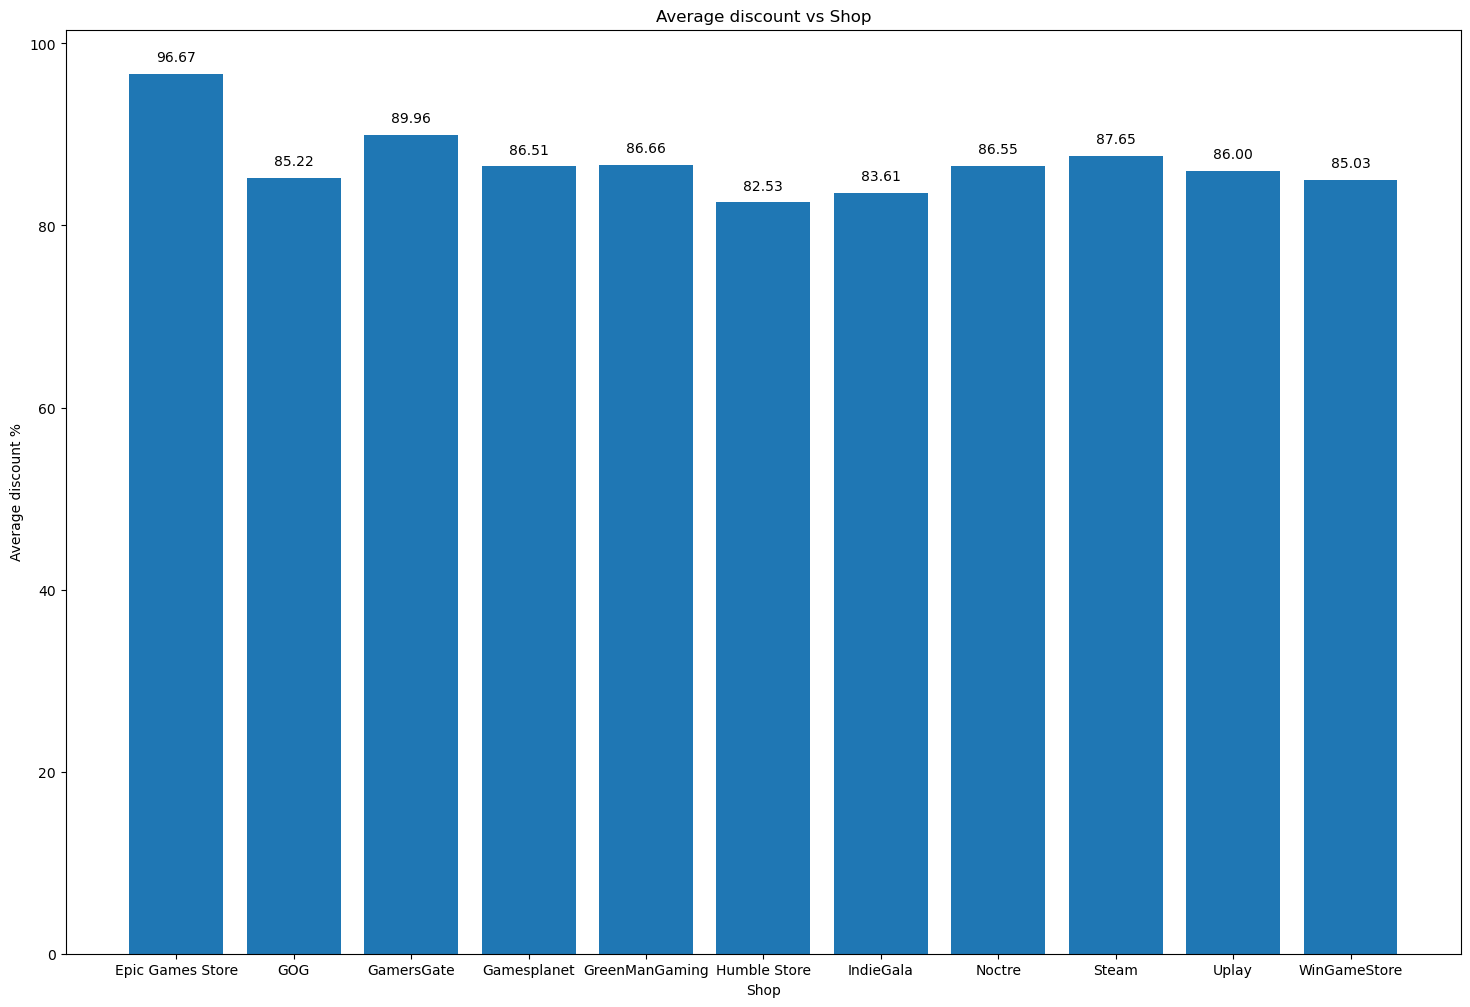

In [24]:
average_disc_vs_shop_bar(deals_df)

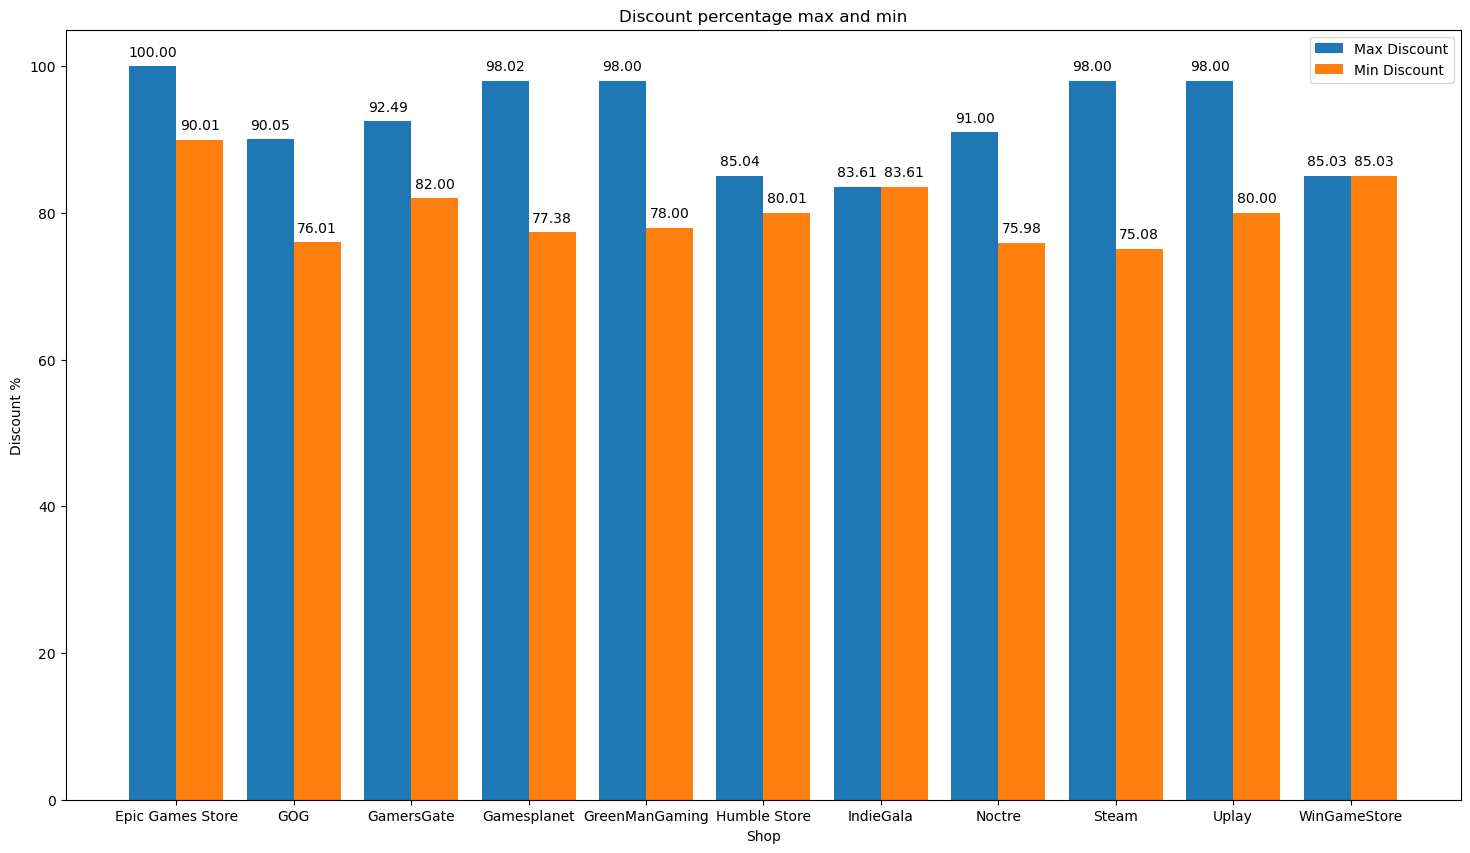

In [25]:
min_max_disc_vs_shop_bar(deals_df)

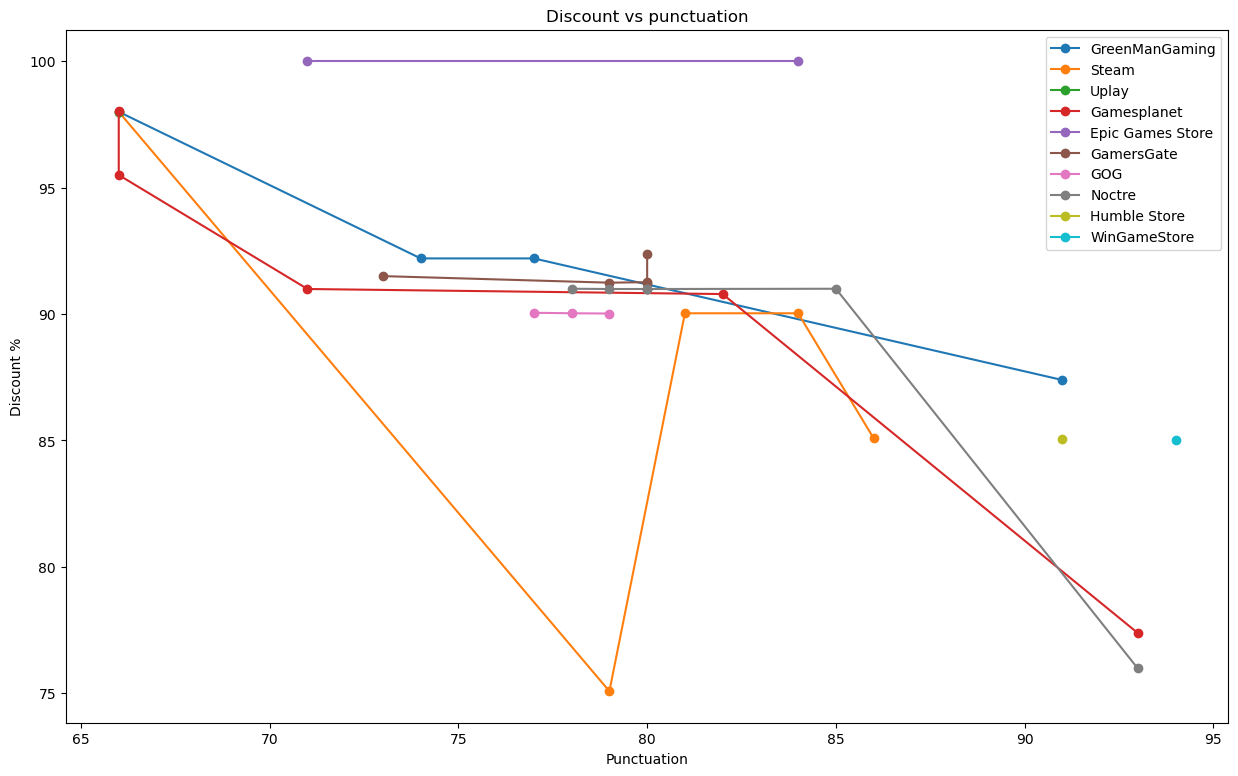

In [26]:
linear_graph_discounts_vs_punct_linear(deals_df)

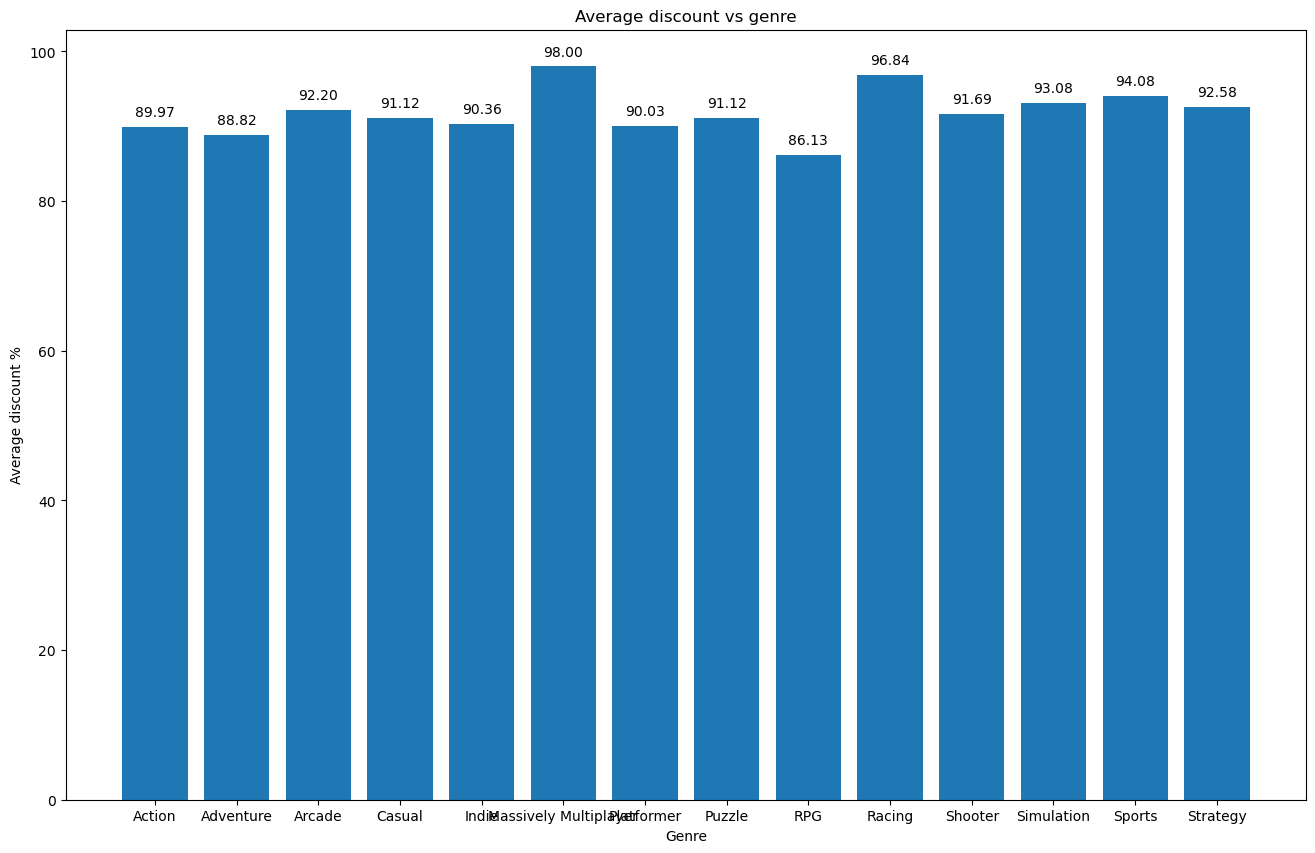

In [27]:
genre_vs_mean_discount_bar(unroll_list_from_dfcolumn(deals_df, 'genre'))

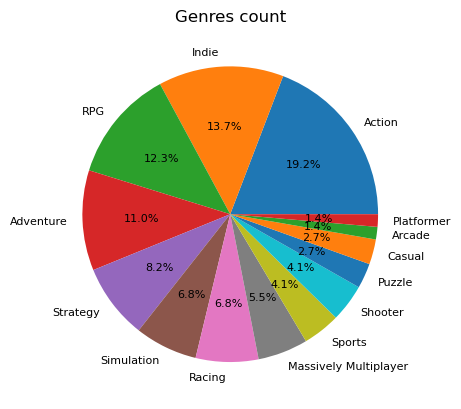

In [28]:
circular_pie_chart_genres(unroll_list_from_dfcolumn(deals_df, 'genre'))

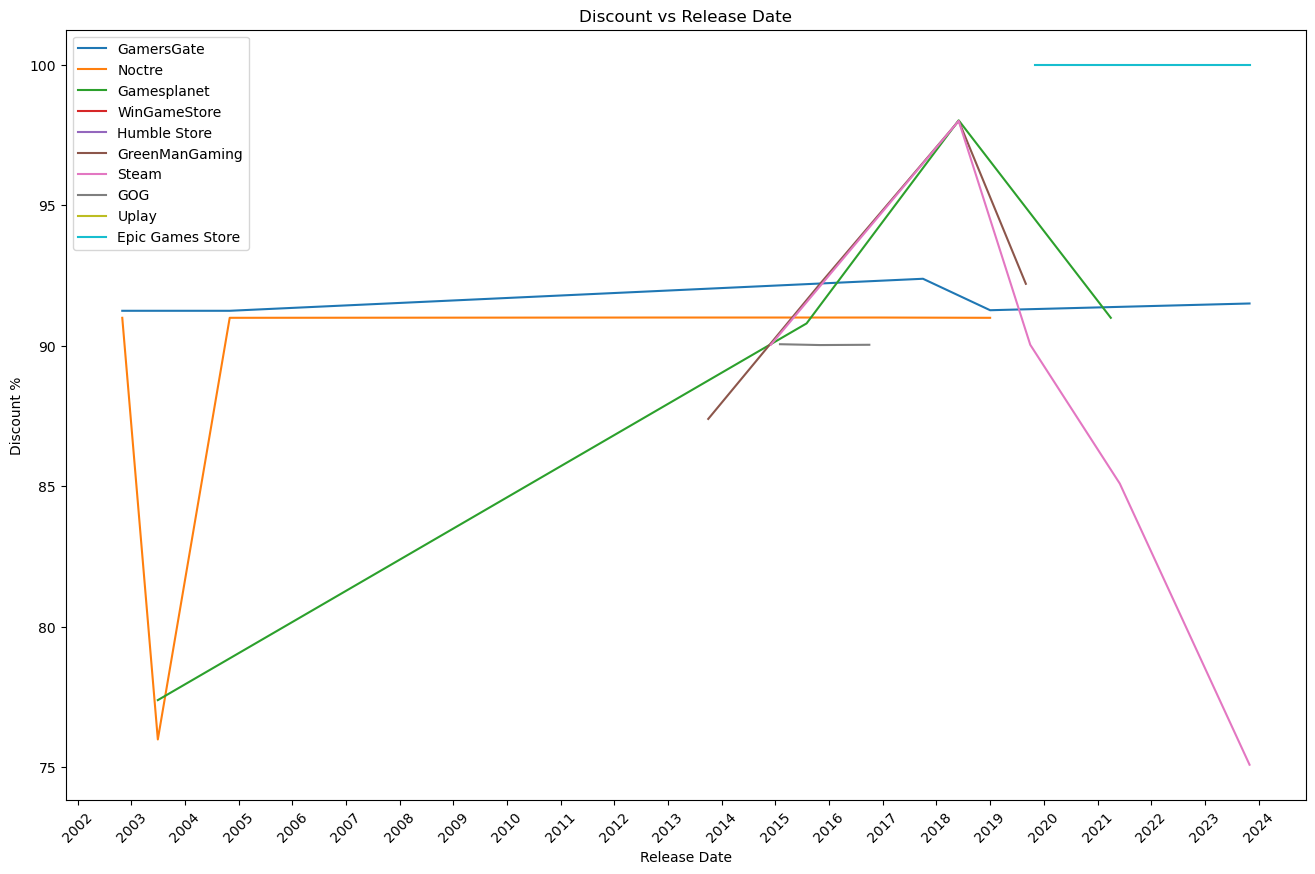

In [29]:
linear_graph_discounts_vs_releasedate(clean_df_releases(deals_df))